<a href="https://colab.research.google.com/github/williamshiaogit/DL-ML-AI-learning/blob/master/CNN0824.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.datasets.cifar10 import load_data
(x_train, y_train), (x_test, y_test) = load_data()


170500096/170498071 [==============================] - 6s 0us/step


In [ ]:
x_train

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
print(x_train.shape)
print(x_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [ ]:
trans = [
    "airplane",
    "automobile",
    "bird",
    "cat",
    "deer",
    "dog",
    "frog",
    "horse",
    "ship",
    "truck"
]

frog


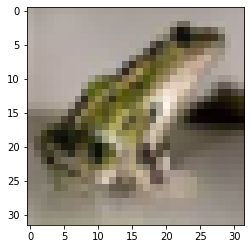

In [ ]:
import random
import matplotlib.pyplot as plt
%matplotlib inline
i = random.randint(0, 49999)
print(trans[y_train[i][0]])
plt.imshow(x_train[i])

In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Sequential
layers = [
    # 3 * 3 * 3(一個過濾器) * 64(個) + 64(bias) = 1792
    Conv2D(64, 3, padding="same", activation="relu", input_shape=(32, 32, 3)),
    MaxPooling2D(),
    # 3 * 3 * 64(一個過濾器) * 128(個) + 128(bias) = 73856
    Conv2D(128, 3, padding="same", activation="relu"),
    MaxPooling2D(),

    Conv2D(256, 3, padding="same", activation="relu"),
    MaxPooling2D(),
    Flatten(),
    Dense(256, activation="relu"),
    Dropout(0.25),
    Dense(10, activation="softmax")
]
model = Sequential(layers)
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 16, 16, 128)       73856     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 8, 8, 256)         295168    
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 4, 4, 256)         0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 4096)             

In [ ]:
# GlobalAveragePooling2D 試試看的版本 參數較少
# 結果訓練時間比較長 準確率上升1%而已
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Sequential
layers = [
    # 3 * 3 * 3(一個過濾器) * 64(個) + 64(bias) = 1792
    Conv2D(64, 3, padding="same", activation="relu", input_shape=(32, 32, 3)),
    MaxPooling2D(),
    # 3 * 3 * 64(一個過濾器) * 128(個) + 128(bias) = 73856
    Conv2D(128, 3, padding="same", activation="relu"),
    MaxPooling2D(),

    Conv2D(256, 3, padding="same", activation="relu"),
    GlobalAveragePooling2D(),
    Dense(10, activation="softmax")
]
model = Sequential(layers)
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 32, 32, 64)        1792      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 16, 16, 128)       73856     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 8, 8, 256)         295168    
_________________________________________________________________
global_average_pooling2d (Gl (None, 256)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 10)               

In [ ]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy
model.compile(loss=SparseCategoricalCrossentropy(),
              optimizer="adam",
              metrics=["accuracy"])

In [ ]:
x_train_norm = x_train / 255
x_test_norm = x_test / 255

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
callbacks = [
    ModelCheckpoint("cnn.h5", save_best_only=True),
    EarlyStopping(patience=5, restore_best_weights=True)
]
model.fit(x_train_norm,
    y_train,
    batch_size=200,
    epochs=50,
    verbose=2,
    validation_split=0.1,
    callbacks=callbacks)

Epoch 1/50
225/225 - 3s - loss: 0.4492 - accuracy: 0.8431 - val_loss: 0.6314 - val_accuracy: 0.7896
Epoch 2/50
225/225 - 3s - loss: 0.4510 - accuracy: 0.8434 - val_loss: 0.6402 - val_accuracy: 0.7876
Epoch 3/50
225/225 - 3s - loss: 0.4353 - accuracy: 0.8484 - val_loss: 0.6458 - val_accuracy: 0.7852
Epoch 4/50
225/225 - 3s - loss: 0.4344 - accuracy: 0.8494 - val_loss: 0.6428 - val_accuracy: 0.7898
Epoch 5/50
225/225 - 3s - loss: 0.4162 - accuracy: 0.8549 - val_loss: 0.6464 - val_accuracy: 0.7906
Epoch 6/50
225/225 - 3s - loss: 0.4075 - accuracy: 0.8576 - val_loss: 0.6548 - val_accuracy: 0.7858


In [ ]:
model.evaluate(x_test_norm, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.6429 - accuracy: 0.7830


[0.6428593397140503, 0.7829999923706055]

In [ ]:
pre = model.predict_classes(x_test_norm)
pre

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([3, 8, 8, ..., 5, 1, 7])

In [ ]:
print(pre.shape)
print(y_test.shape)
y_test_reshape = y_test.reshape(-1)
print(y_test_reshape.shape)

(10000,)
(10000, 1)
(10000,)


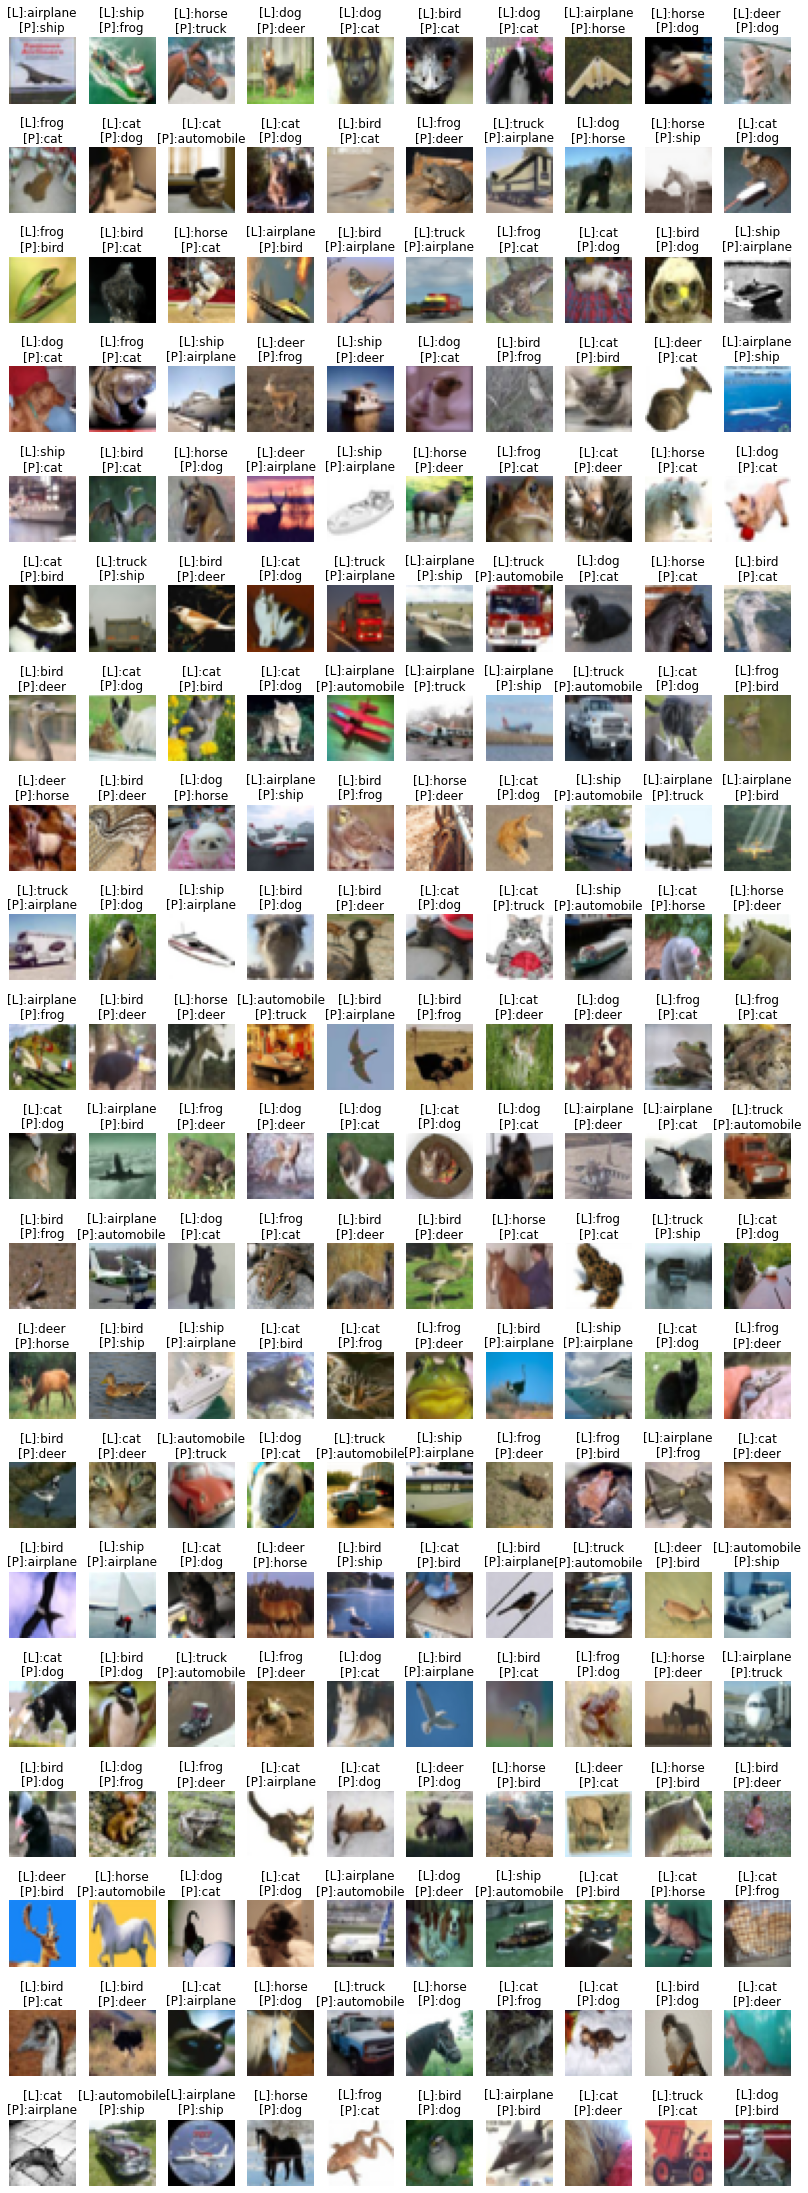

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(14, 42))
idx = np.nonzero(pre != y_test_reshape)[0]
idx = idx[:200]
width = 10
height = len(idx) // width + 1
for i, d  in enumerate(idx):
    img, label, p = x_test[d], y_test_reshape[d], pre[d]
    t = "[L]:{}\n[P]:{}".format(trans[label], trans[p])
    plt.subplot(height, width, i+1)
    plt.title(t)
    plt.axis("off")
    plt.imshow(img)

輸入網址:

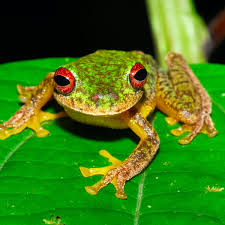

InvalidSchema: ignored

In [ ]:
import requests
from PIL import Image
from tensorflow.keras.preprocessing.image import load_img

url = input("輸入網址:")
# 純文字: stream不加, 檔案: stream=True
# verify=False 防火牆調低
response = requests.get(url, stream=True, verify=False)
img = Image.open(response.raw).resize((32, 32))
img = np.array(img)
# reshape 要注意(1, 32, 32, 3)跟(32, 32, 3) 不一樣
img_np = np.array(img).reshape(1, 32, 32, 3) / 255
pre = model.predict(img_np)[0]
for i in range(10):
    print(trans[i], "的機率:", round(pre[i], 2))
plt.imshow(np.array(img), cmap="Reds")